In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
data = pd.read_csv('../data/India-food/indian_food.csv')
data.dropna(inplace = True)

In [3]:
data.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [7]:
def ingredients(data):
    temp = data['ingredients'].str.lower().str.split(',')
    mf = MultiLabelBinarizer()
    df = pd.DataFrame(mf.fit_transform(temp),columns=mf.classes_)
    data.drop(columns='ingredients',inplace = True)              
    return data.merge(df,left_index=True,right_index=True)

In [8]:
data = ingredients(data)

In [9]:
data.head()

,name,diet,prep_time,cook_time,flavor_profile,course,state,region,jaggery,all purpose flour,...,tea leaves,thin rice flakes,tomato,urad dal,vermicelli pudding,wheat flour,whole wheat flour,whole wheat rava,yoghurt,yogurt
0,Balu shahi,vegetarian,45,25,sweet,dessert,West Bengal,East,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Boondi,vegetarian,80,30,sweet,dessert,Rajasthan,West,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gajar ka halwa,vegetarian,15,60,sweet,dessert,Punjab,North,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ghevar,vegetarian,15,30,sweet,dessert,Rajasthan,West,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Gulab jamun,vegetarian,15,40,sweet,dessert,West Bengal,East,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='course', ylabel='count'>

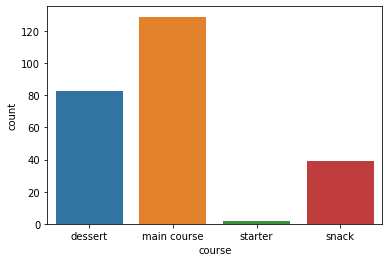

In [16]:
sns.countplot(x = data['course'])
# pd.value_counts(data['course'])

<AxesSubplot:xlabel='region', ylabel='count'>

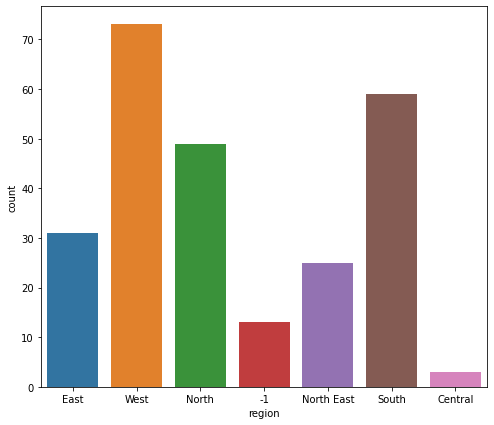

In [23]:
plt.figure(figsize = (8,7))
sns.countplot(x = data['region'])

In [7]:
def encoder(data):
    need_to_encode = ['diet','flavor_profile','course','state','region']
    lb = LabelEncoder()
    # lb.fit_transform(data['region'])
    encoded = []
    for i in need_to_encode:
        encoded.append(lb.fit_transform(data[i]))
    data_encoded = pd.DataFrame(np.array(encoded).transpose() , columns=need_to_encode)
    data.drop(columns = need_to_encode , inplace = True)
    return data.merge(data_encoded,left_index=True,right_index=True)

In [8]:
df = encoder(data)

In [9]:
df.head()

,name,prep_time,cook_time,jaggery,all purpose flour,almond,almonds,aloo,alum powder,amchur powder,...,wheat flour,whole wheat flour,whole wheat rava,yoghurt,yogurt,diet,flavor_profile,course,state,region
0,Balu shahi,45,25,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,24,2
1,Boondi,80,30,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,18,6
2,Gajar ka halwa,15,60,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,17,3
3,Ghevar,15,30,0,0,0,1,0,0,0,...,0,0,0,0,0,1,4,0,18,6
4,Gulab jamun,15,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4,0,24,2


In [10]:
X = df.drop(columns='name')

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 8)
kmeans.fit(X)

KMeans()

In [19]:
kmeans.cluster_centers_

array([[1.52222222e+01, 6.41666667e+01, 1.73472348e-18, ...,
        4.72222222e-01, 1.34166667e+01, 3.61111111e+00],
       [3.60000000e+02, 9.00000000e+01, 0.00000000e+00, ...,
        1.66666667e+00, 9.66666667e+00, 5.00000000e+00],
       [1.00000000e+01, 7.20000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 1.20000000e+01, 6.00000000e+00],
       ...,
       [2.20000000e+02, 4.75000000e+01, 0.00000000e+00, ...,
        1.00000000e+00, 1.08333333e+01, 4.00000000e+00],
       [4.91666667e+02, 6.33333333e+01, 0.00000000e+00, ...,
        6.66666667e-01, 8.00000000e+00, 3.33333333e+00],
       [6.12820513e+00, 1.07179487e+01, 1.28205128e-02, ...,
        9.74358974e-01, 9.58974359e+00, 4.46153846e+00]])

In [20]:
kmeans.labels_

array([3, 4, 0, 3, 3, 0, 0, 7, 3, 3, 3, 7, 3, 3, 3, 3, 3, 7, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 3, 6, 3, 3, 3, 5, 0, 3, 0, 0, 3, 7, 0, 3, 3, 3,
       7, 7, 5, 3, 5, 7, 0, 7, 7, 7, 3, 0, 3, 0, 0, 3, 7, 3, 2, 0, 3, 7,
       5, 7, 7, 7, 3, 3, 3, 3, 3, 0, 3, 3, 7, 3, 0, 4, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 7, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 7,
       7, 3, 3, 6, 0, 3, 3, 7, 3, 3, 3, 5, 5, 4, 3, 3, 7, 1, 4, 1, 3, 7,
       3, 7, 7, 3, 0, 7, 7, 7, 7, 0, 3, 1, 3, 7, 7, 7, 3, 7, 4, 7, 7, 3,
       6, 3, 4, 4, 7, 7, 7, 3, 3, 7, 3, 3, 7, 3, 7, 3, 3, 7, 3, 3, 7, 3,
       3, 7, 3, 7, 7, 3, 7, 7, 7, 3, 7, 3, 3, 7, 3, 3, 3, 3, 7, 3, 3, 3,
       3, 3, 3, 4, 3, 3, 3, 7, 3, 3, 0, 3, 3, 7, 7, 7, 3, 7, 7, 3, 3, 7,
       3, 7, 7, 3, 7, 3, 7, 7, 7, 7, 3, 3, 0, 7, 3, 3, 7, 7, 7, 7, 7, 7,
       3, 7, 7, 7, 0, 7, 7, 3, 0, 7])